In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import os
import torchvision
import matplotlib.pyplot as plt

In [2]:
train_dataset=datasets.MNIST(root='./data',train=True,download=False,transform=transforms.ToTensor())
test_dataset=datasets.MNIST(root='./data',train=False,download=False,transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=128,shuffle=True)
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=128,)

In [3]:
for i,(images,labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    print(torch.min(images),torch.max(images))
    break


torch.Size([128, 1, 28, 28])
torch.Size([128])
tensor(0.) tensor(1.)


torch.Size([1, 28, 28])
5


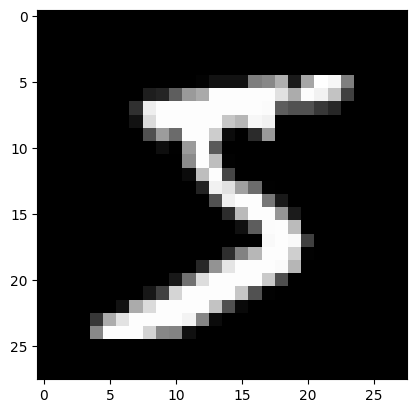

In [4]:
#plotting a image
image,label=train_dataset[0]
print(image.shape)
plt.imshow(image.permute(1,2,0),cmap='gray')
print(label)

In [5]:
class Autoencoder(nn.Module):
    """Some Information about Autoencoder"""
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder=nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3),
        )       
        self.decoder=nn.Sequential(
            nn.Linear(3,12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid()
        )


    def forward(self, x):
        encoded=self.encoder(x)
        decoded=self.decoder(encoded)
        return decoded

In [6]:
model=Autoencoder()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2,weight_decay=1e-5)
criterion=nn.MSELoss()


In [9]:
epochs=5
training_loss=[]
outputs=[]
# training_accuracy=[]
# test_loss=[]
# test_accuracy=[]
for epoch in range(epochs):
    iter_loss=0
    iterations=0
    for i,(images,labels) in enumerate(train_loader):
        iterations+=1
        images=images.reshape(-1,784)
        output=model(images)
        loss=criterion(output,images)
        optimizer.zero_grad()
        # loss.requires_grad=True
        loss.backward()
        optimizer.step()
        # print('loss in batch:{}',loss.item())
        iter_loss+=loss.item()
    print('epoch {},loss in this epoch {}'.format(epoch+1,loss.item()))
    # print('iter loss',iter_loss/iterations)
    outputs.append((epoch,images,output))
    # print(list(training_loss))
    # training_accuracy.append(100* correct/len(train_dataset))
    # print(list(training_/accuracy))

# print('training loss',training_loss[-1])



epoch 1,loss in this epoch 0.04070041701197624
epoch 2,loss in this epoch 0.035548850893974304
epoch 3,loss in this epoch 0.03930368274450302
epoch 4,loss in this epoch 0.037631113082170486
epoch 5,loss in this epoch 0.0343959704041481


In [12]:
len(outputs)

5

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

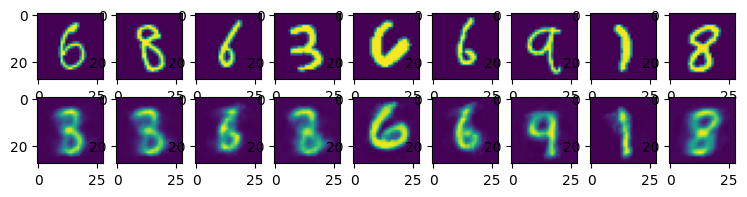

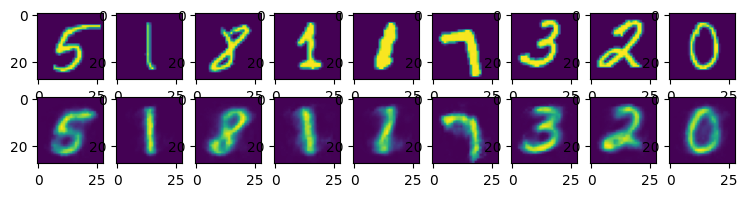

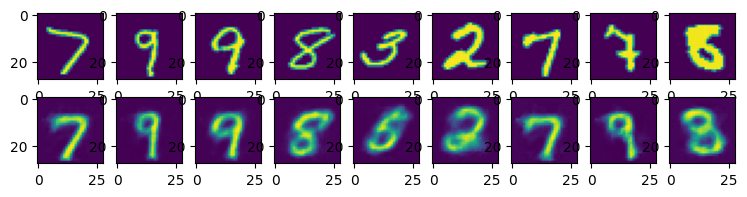

In [21]:
#plotting reconstructed image
for k in range(0,epochs,2):
    plt.figure(figsize=(9,2))
    plt.gray
    original=outputs[k][1].detach().numpy()
    reconimage=outputs[k][2].detach().numpy()
    for i,item in enumerate(original):
        if i>=9: break
        plt.subplot(2,9,i+1)
        item=item.reshape(-1,28,28)
        plt.imshow(item[0])
    for i,item in enumerate(reconimage):
        if i>=9: break
        plt.subplot(2,9,9+i+1)
        item=item.reshape(-1,28,28)
        plt.imshow(item[0])
    